# LDSC NGC OAall 
**Author**: Jesse Marks <br>
**GitHub Issue:** [140](https://github.com/RTIInternational/bioinformatics/issues/140)
**GWAS location:** <br>
* `s3://rti-heroin/rti-midas-data/studies/ngc/meta/113/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr{1..22}.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz` 
* `s3://rti-heroin/rti-midas-data/studies/ngc/meta/115/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr{1..22}.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz`<br>

**Results Location:** 

**Description**:
Recalculating the SNP-based heritability for the new OAall metas with 113 and 115. These meta-analyses include an updated version of Yale-Penn Perhaps correcting Yale-Penn gives us better estimates. We'd also like to see if the big difference between including decode OAall and OAexp persists. 


We are going to utilize the [LD score regression pipeline](https://github.com/RTIInternational/ld-regression-pipeline) that Alex Waldrop developed to perform LD score regression. 

**Note:** The h^2 ended up being greater than 1. After researching this issue it was decided that the sample size was too small. LDSC software calls for ~5K samples for an accurate calculation. Here was an order of maginitude off. 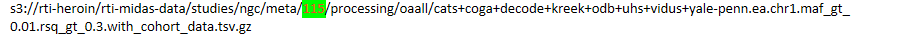

### Data wrangling
Format the summary stats for input into cromwell.

#### meta128

In [ ]:
## process meta_128 ##
mkdir -p /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0004/eur/meta128
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0004/eur/meta128/
prefix=oaall_meta128
N=22373

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/128/processing/oaall/cats+coga+decode+kreek+odb+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.tsv.gz . 
done 
# combine into one file
zcat  cats+coga+decode+kreek+odb+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.tsv.gz \
    > $prefix.txt

for chr in {2..22}; do
    zcat  cats+coga+decode+kreek+odb+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.tsv.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt
wc -l $prefix.txt 

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/

#### meta127

In [ ]:
## process meta_127 ##
mkdir -p /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0004/eur/meta127
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0004/eur/meta127/
prefix=oaall_meta127
N=23987

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/127/processing/oaall/cats+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.tsv.gz . 
done 
# combine into one file
zcat cats+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.tsv.gz \
    > $prefix.txt

for chr in {2..22}; do
    zcat cats+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.tsv.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt
wc -l $prefix.txt 

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/

#### meta125

In [ ]:
## process meta_125 ##
mkdir -p /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0003/eur/meta115
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0003/eur/meta115/
prefix=oaall_meta125
N=29037

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/125/processing/oaall/cats+coga+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.tsv.gz . 
done 
# combine into one file
zcat cats+coga+kreek+odb+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.tsv.gz \
    > $prefix.txt

for chr in {2..22}; do
    zcat cats+coga+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.tsv.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt
wc -l $prefix.txt 

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/

#### meta115

In [ ]:
## process meta_115 ##
mkdir -p /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0002/eur/meta115
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0002/eur/meta115/
prefix=oaall_meta115
N=31618

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/115/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz . 
done 
# combine into one file
zcat cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz \
    > $prefix.txt

for chr in {2..22}; do
    zcat cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt
wc -l $prefix.txt 

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/

#### meta113

In [ ]:
## process meta_113 ##
mkdir -p /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0002/eur/meta113/
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0002/eur/meta113/
prefix=oaall_meta113
N=304505

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/113/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz .
done 

# combine into one file
zcat cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz \
    > $prefix.txt

for chr in {2..22}; do
    zcat cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.tsv.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt
wc -l $prefix.txt 

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/

## split by chrosome
awk '
    NR==1{ h = $0}
    NR>1 { print (!a[$2]++ ? h ORS $0: $0) > "oaall_meta113_ldsc_ready_chr"$2".txt"}    
'  <(zcat ${prefix}_ldsc_ready.txt.gz) 

gzip ${prefix}_ldsc_ready_chr*.txt

for i in {1..22}; do
    aws s3 cp ${prefix}_ldsc_ready_chr${i}.txt.gz \
    s3://rti-shared/ldsc/data/oaall/meta113/
done

#### meta107

In [ ]:
## process meta_107 ##
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0002/eur/meta107/
prefix=oaall_meta107
N=30037

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/107/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz . --quiet 
done 

# combine into one file
zcat cats+coga+decode+kreek+odb+uhs+vidus.ea.chr1.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz \
    > $prefix.txt

for chr in {2..22}; do
    zcat cats+coga+decode+kreek+odb+uhs+vidus.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt
wc -l $prefix.txt 

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

## convert to Zscore
#docker run -it -v "$PWD:/data/" \
#               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
#    continuumio/anaconda3 python /data/python_convert/sumstats.py zscore \
#        --sumstats /data/oaall_meta115.csv \
#        --out /data/oaall_meta115_z.csv 

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/


#### meta094

In [ ]:
## process meta_094 ##
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0002/eur/meta094/
prefix=oaall_meta094
N=31620

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/094/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz . --quiet 
done 

# combine into one file
zcat  cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz \
 > $prefix.txt

for chr in {2..22}; do
    zcat cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt -5 | cut -f1-15
wc -l $prefix.txt &

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

## convert to Zscore
#docker run -it -v "$PWD:/data/" \
#               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
#    continuumio/anaconda3 python /data/python_convert/sumstats.py zscore \
#        --sumstats /data/oaall_meta115.csv \
#        --out /data/oaall_meta115_z.csv 

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/


#### meta089

In [ ]:
## process meta_089 ##
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0002/eur/meta089/
prefix=oaall_meta089
N=304507

# download meta results
for chr in {1..22};do 
    aws s3 cp s3://rti-heroin/rti-midas-data/studies/ngc/meta/089/processing/oaall/cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz . 
done 

# combine into one file
zcat cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz \
    > $prefix.txt

for chr in {2..22}; do
    zcat  cats+coga+decode+kreek+odb+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.with_cohort_data.gz | \
      tail -n +2  >> $prefix.txt
done 

head $prefix.txt
wc -l $prefix.txt

# QC
docker run -it -v "$PWD:/data/" \
               -v "/shared/jmarks/bin/python_convert/:/data/python_convert/" \
    continuumio/anaconda3 python  /data/python_convert/sumstats.py csv \
        --sumstats /data/$prefix.txt \
        --out /data/$prefix.csv \
        --force \
        --a1 Allele2 \
        --a2 Allele1 \
        --auto \
        --head 5 \
        --n-val $N

# SNP CHR BP A1 A2 BETA  PVAL  N 
awk '{print $1, $2, $3, $5,$6,$8,$4,$7}' OFS="\t" $prefix.csv \
    > ${prefix}_ldsc_ready.txt 

gzip ${prefix}_ldsc_ready.txt

## upload to S3
aws s3 cp ${prefix}_ldsc_ready.txt.gz s3://rti-shared/ldsc/data/oaall/


# 0001 
Version B is what is on GitHub.

## A (with FTND)
FTND as ref vs meta113 and meta115

WF Job IDs:<br>
`4c0bec40-10bc-449c-96ba-d24671ee02c5`

`2f52f9f9-6719-4ef4-a56a-48c923cd8288`

`42a9e7b5-932f-4e4c-a9bc-eb3f0b761991`

### Create WorkFlow inputs
Here is an example entry in the Excel Phenotype File:

**trait	plot_label	sumstats_path	pmid	category	sample_size	id_col	chr_col	pos_col	effect_allele_col	ref_allele_col	effect_col	pvalue_col	sample_size_col	effect_type	w_ld_chr**
```
COPDGWAS Hobbs et al.	COPD	s3://rti-nd/LDSC/COPDGWAS_HobbsEtAl/modGcNoOtherMinMissSorted.withchrpos.txt.gz	28166215	Respiratory	51772	3	1	2	4	5	10	12		beta	s3://clustername--files/eur_w_ld_chr.tar.bz2
```

In [ ]:
## 1. upload Excel phenotype file to EC2 instance
## 2. then edit full_ld_regression_wf_template.json to include the reference data of choice
## 3. lastly use dockerized tool to finish filling out the json file that will be input for workflow

## login to a larger compute node
qrsh

phen=20200728_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0001/eur
mkdir -p $procD/{ldhub,plot} # for later processing
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline
mkdir $procD/ld-regression-pipeline/workflow_inputs

# create final workflow input (a json file) 
cp $procD/ld-regression-pipeline/json_input/full_ld_regression_wf_template.json \
    $procD/ld-regression-pipeline/workflow_inputs/
# edit this file

## upload files to */workflow_inputs/
#scp -i ~/.ssh/gwas_rsa 20200728_heroin_ldsc_phenotypes_local.xlsx     ec2-user@34.195.174.206:/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0001/eur/ld-regression-pipeline/workflow_inputs/

## create config file
docker run -v $procD/ld-regression-pipeline/workflow_inputs/:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/$phen >\
        $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json


## zip appropriate files 
# Change to directory immediately above metaxcan-pipeline repo
cd $procD/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## copy cromwell config file from S3 to EC2 instance
cd /shared/jmarks/bin/cromwell
#aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .


In [ ]:
## Run Workflow
curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@$procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl" \
    -F "workflowInputs=@$procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json" \
    -F "workflowDependencies=@$procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip"

## B 
just meta113 & meta115
`84aea61b-2233-432d-b7ea-b57abde69e0f`<br>

`05872e14-00ec-43ef-9d81-18ebf7f2e8c2`

`b75d3427-0f02-43de-943e-6e5aec99750d`

`6e30d8d2-a938-4eff-833b-8f27073cf4dd`

`2160bbb5-ca37-4ff6-8729-a9d6de2816a2`

`2723da3f-2eb9-4723-a83d-1379ff1532ba`

In [ ]:
## 1. upload Excel phenotype file to EC2 instance
## 2. then edit full_ld_regression_wf_template.json to include the reference data of choice
## 3. lastly use dockerized tool to finish filling out the json file that will be input for workflow

## login to a larger compute node
qrsh

phen=20200728_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0002/eur
mkdir -p $procD/{ldhub,plot} # for later processing
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline
mkdir $procD/ld-regression-pipeline/workflow_inputs

# create final workflow input (a json file) 
cp $procD/ld-regression-pipeline/json_input/full_ld_regression_wf_template.json \
    $procD/ld-regression-pipeline/workflow_inputs/
# edit this file

## upload files to */workflow_inputs/
#scp -i ~/.ssh/gwas_rsa 20200728_heroin_ldsc_phenotypes_local.xlsx     ec2-user@34.195.174.206:/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0001/eur/ld-regression-pipeline/workflow_inputs/

docker run -v $procD/ld-regression-pipeline/workflow_inputs/:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/$phen >\
        $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

In [ ]:
## zip appropriate files 
# Change to directory immediately above metaxcan-pipeline repo
cd $procD/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## copy cromwell config file from S3 to EC2 instance
cd /shared/jmarks/bin/cromwell
#aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .

## Run workflow—Navigate to cromwell directory
#java -Dconfig.file=/shared/jmarks/bin/cromwell/cromwell_default_genomics_queue.conf \
#    -jar ~/bin/cromwell/cromwell-51.jar \
#    run $procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl \
#    -i $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json \
#    -p $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@$procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl" \
    -F "workflowInputs=@$procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json" \
    -F "workflowDependencies=@$procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip"

# 0002
3f93045f-8606-4ef8-95c7-4691fc3c0e74

In [ ]:
## 1. upload Excel phenotype file to EC2 instance
## 2. then edit full_ld_regression_wf_template.json to include the reference data of choice
## 3. lastly use dockerized tool to finish filling out the json file that will be input for workflow

## login to a larger compute node
qrsh

phen=20200730_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0002/eur
mkdir -p $procD/{ldhub,plot} # for later processing
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline
mkdir $procD/ld-regression-pipeline/workflow_inputs

# create final workflow input (a json file) 
cp $procD/ld-regression-pipeline/json_input/full_ld_regression_wf_template.json \
    $procD/ld-regression-pipeline/workflow_inputs/
# edit this file

## upload files to */workflow_inputs/
#scp -i ~/.ssh/gwas_rsa 20200728_heroin_ldsc_phenotypes_local.xlsx     ec2-user@34.195.174.206:/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0001/eur/ld-regression-pipeline/workflow_inputs/

docker run -v $procD/ld-regression-pipeline/workflow_inputs/:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/$phen >\
        $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

In [ ]:
## zip appropriate files 
# Change to directory immediately above metaxcan-pipeline repo
cd $procD/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## copy cromwell config file from S3 to EC2 instance
cd /shared/jmarks/bin/cromwell
#aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .

## Run workflow—Navigate to cromwell directory
#java -Dconfig.file=/shared/jmarks/bin/cromwell/cromwell_default_genomics_queue.conf \
#    -jar ~/bin/cromwell/cromwell-51.jar \
#    run $procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl \
#    -i $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json \
#    -p $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@$procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl" \
    -F "workflowInputs=@$procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json" \
    -F "workflowDependencies=@$procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip"

In [3]:
%%bash 

job="3f93045f-8606-4ef8-95c7-4691fc3c0e74"
phen="oaall"
project="heroin"
version="0002"


mkdir -p ~/Projects/$project/ldsc/$phen/$version/processing/output
cd ~/Projects/$project/ldsc/$phen/$version/processing/output
    
#Download output from Swagger UI.
curl -X GET "http://localhost:8000/api/workflows/v1/$job/outputs" -H "accept: application/json" \
    > final_outputs_${job}.json

curl -X GET "http://localhost:8000/api/workflows/v1/$job/logs" -H "accept: application/json" \
    > final_logs_${job}.json

aws s3 cp s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/$job/call-ld_regression/ \
    . --recursive --exclude "*" --include "*.ldsc_regression.log"
    
mv shard-*/LDSC.single_ld_regression_wf/*/call-ld_regression/*.ldsc_regression.log .
rm -rf shard-*

# note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o

with open('final_outputs_' + "$job" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-heroin/ldsc/results/results/oaall/eur/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-heroin/ldsc/results/results/oaall/eur/".format(outputs[key])
                os.system(message)
EOF

# Rename files
#for file in $(aws s3 ls s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
#    finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
#
#    aws s3 mv s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/$file \
#              s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/$finalFile
#done

download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/3f93045f-8606-4ef8-95c7-4691fc3c0e74/call-ld_regression/shard-0/LDSC.single_ld_regression_wf/25a3e2a6-a2bd-486e-aaa0-9c1f97dab120/call-ld_regression/meta113_by_meta115.ldsc_regression.log to shard-0/LDSC.single_ld_regression_wf/25a3e2a6-a2bd-486e-aaa0-9c1f97dab120/call-ld_regression/meta113_by_meta115.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/3f93045f-8606-4ef8-95c7-4691fc3c0e74/call-ld_regression/shard-2/LDSC.single_ld_regression_wf/7847f217-ddf8-460f-ac0f-02bde4d1acad/call-ld_regression/meta113_by_meta094.ldsc_regression.log to shard-2/LDSC.single_ld_regression_wf/7847f217-ddf8-460f-ac0f-02bde4d1acad/call-ld_regression/meta113_by_meta094.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/3f93045f-8606-4ef8-95c7-4691fc3c0e74/call-ld_regression/shard-1/LDSC.single_ld_regression_wf/14ecd43a-922c-4af3-94aa-01f286371

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2116  100  2116    0     0    743      0  0:00:02  0:00:02 --:--:--   743
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    45  100    45    0     0     22      0  0:00:02  0:00:01  0:00:01    22


# 0003
meta113 vs 125,115,107,094,089

`{"id":"4f7cb309-4a2d-428b-8771-f926145087aa","status":"Submitted"}`

In [ ]:
## 1. upload Excel phenotype file to EC2 instance
## 2. then edit full_ld_regression_wf_template.json to include the reference data of choice
## 3. lastly use dockerized tool to finish filling out the json file that will be input for workflow

## login to a larger compute node
qrsh

phen=20200804_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0003/eur
mkdir -p $procD/{ldhub,plot} # for later processing
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline
mkdir $procD/ld-regression-pipeline/workflow_inputs

# create final workflow input (a json file) 
cp $procD/ld-regression-pipeline/json_input/full_ld_regression_wf_template.json \
    $procD/ld-regression-pipeline/workflow_inputs/
# edit this file

## upload files to */workflow_inputs/
#scp -i ~/.ssh/gwas_rsa 20200728_heroin_ldsc_phenotypes_local.xlsx     ec2-user@34.195.174.206:/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0001/eur/ld-regression-pipeline/workflow_inputs/

docker run -v $procD/ld-regression-pipeline/workflow_inputs/:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/$phen >\
        $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

In [ ]:
## zip appropriate files 
# Change to directory immediately above metaxcan-pipeline repo
cd $procD/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

cd /shared/jmarks/bin/cromwell

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@$procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl" \
    -F "workflowInputs=@$procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json" \
    -F "workflowDependencies=@$procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip"

In [1]:
%%bash 

job="4f7cb309-4a2d-428b-8771-f926145087aa"
phen="oaall"
project="heroin"
version="0003"


mkdir -p ~/Projects/$project/ldsc/$phen/$version/processing/output/logs/
cd ~/Projects/$project/ldsc/$phen/$version/processing/output
    
# Download output JSON from Swagger UI.
curl -X GET "http://localhost:8000/api/workflows/v1/$job/outputs" -H "accept: application/json" \
    > final_outputs_${job}.json

curl -X GET "http://localhost:8000/api/workflows/v1/$job/logs" -H "accept: application/json" \
    > final_logs_${job}.json

# Download logs that contain h2
aws s3 cp s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/$job/call-ld_regression/ \
    logs/ --recursive --exclude "*" --include "*.ldsc_regression.log" 
    
mv logs/shard-*/LDSC.single_ld_regression_wf/*/call-ld_regression/*.ldsc_regression.log logs/
rm -rf logs/shard-*


# Download plot
aws s3 cp s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/$job/call-plot_ld/ \
    . --recursive --exclude "*" --include "*.ld_regression_results.*"


# note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o

with open('final_outputs_' + "$job" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-heroin/ldsc/results/oaall/eur/$version/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-heroin/ldsc/results/oaall/eur/$version/".format(outputs[key])
                os.system(message)
EOF

# Rename files
#for file in $(aws s3 ls s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
#    finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
#
#    aws s3 mv s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/$file \
#              s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/$finalFile
#done

download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/4f7cb309-4a2d-428b-8771-f926145087aa/call-ld_regression/shard-0/LDSC.single_ld_regression_wf/82ebfafc-6c10-4302-88f0-b803ccaa07cd/call-ld_regression/meta113_by_meta125.ldsc_regression.log to shard-0/LDSC.single_ld_regression_wf/82ebfafc-6c10-4302-88f0-b803ccaa07cd/call-ld_regression/meta113_by_meta125.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/4f7cb309-4a2d-428b-8771-f926145087aa/call-ld_regression/shard-4/LDSC.single_ld_regression_wf/f388a073-c5a6-4aab-b836-7215a0f8d6c5/call-ld_regression/meta113_by_meta089.ldsc_regression.log to shard-4/LDSC.single_ld_regression_wf/f388a073-c5a6-4aab-b836-7215a0f8d6c5/call-ld_regression/meta113_by_meta089.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/4f7cb309-4a2d-428b-8771-f926145087aa/call-ld_regression/shard-1/LDSC.single_ld_regression_wf/bcd4b6a2-8e72-499f-883e-f5a34965e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2397  100  2397    0     0  12229      0 --:--:-- --:--:-- --:--:-- 12229
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    45  100    45    0     0    266      0 --:--:-- --:--:-- --:--:--   264


# 0004
meta113 vs 128,127,125,115,107,094,089

`6b161cb8-d225-4de6-8323-592a8f60d63e`

In [ ]:
## 1. upload Excel phenotype file to EC2 instance
## 2. then edit full_ld_regression_wf_template.json to include the reference data of choice
## 3. lastly use dockerized tool to finish filling out the json file that will be input for workflow

## login to a larger compute node
qrsh

phen=20200810_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0004/eur
mkdir -p $procD/{ldhub,plot} # for later processing
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline
mkdir $procD/ld-regression-pipeline/workflow_inputs

# create final workflow input (a json file) 
cp $procD/ld-regression-pipeline/json_input/full_ld_regression_wf_template.json \
    $procD/ld-regression-pipeline/workflow_inputs/
# edit this file

## upload files to */workflow_inputs/
#scp -i ~/.ssh/gwas_rsa 20200810_heroin_ldsc_phenotypes_local.xlsx     ec2-user@34.195.174.206:/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0004/eur/ld-regression-pipeline/workflow_inputs/

docker run -v $procD/ld-regression-pipeline/workflow_inputs/:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/$phen >\
        $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

In [ ]:
## zip appropriate files 
# Change to directory immediately above metaxcan-pipeline repo
cd $procD/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

#cd /shared/jmarks/bin/cromwell

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@$procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl" \
    -F "workflowInputs=@$procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json" \
    -F "workflowDependencies=@$procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip"

In [3]:
%%bash 

job="6b161cb8-d225-4de6-8323-592a8f60d63e"
phen="oaall"
project="heroin"
version="0004"


mkdir -p ~/Projects/$project/ldsc/$phen/$version/processing/output/logs/
cd ~/Projects/$project/ldsc/$phen/$version/processing/output
    
# Download output JSON from Swagger UI.
curl -X GET "http://localhost:8000/api/workflows/v1/$job/outputs" -H "accept: application/json" \
    > final_outputs_${job}.json

curl -X GET "http://localhost:8000/api/workflows/v1/$job/logs" -H "accept: application/json" \
    > final_logs_${job}.json

# Download logs that contain h2
aws s3 cp s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/$job/call-ld_regression/ \
    logs/ --recursive --exclude "*" --include "*.ldsc_regression.log" 
    
mv logs/shard-*/LDSC.single_ld_regression_wf/*/call-ld_regression/*.ldsc_regression.log logs/
rm -rf logs/shard-*


# Download plot
aws s3 cp s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/$job/call-plot_ld/ \
    . --recursive --exclude "*" --include "*.ld_regression_results.*"
    
mv PLOT.plot_ld_regression_wf/*/call-*/*ld_regression_results* .


Projects note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o

with open('final_outputs_' + "$job" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-heroin/ldsc/results/oaall/eur/$version/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-heroin/ldsc/results/oaall/eur/$version/".format(outputs[key])
                os.system(message)
EOF

# Rename files
#for file in $(aws s3 ls s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
#    finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
#
#    aws s3 mv s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/$file \
#              s3://rti-${project}/ldsc/${study}/results/$phen/$version/$ancestry/$finalFile
#done

download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/6b161cb8-d225-4de6-8323-592a8f60d63e/call-ld_regression/shard-3/LDSC.single_ld_regression_wf/29efe478-80b3-4af7-b6fc-f2ab221bb86c/call-ld_regression/meta113_by_meta115.ldsc_regression.log to logs/shard-3/LDSC.single_ld_regression_wf/29efe478-80b3-4af7-b6fc-f2ab221bb86c/call-ld_regression/meta113_by_meta115.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/6b161cb8-d225-4de6-8323-592a8f60d63e/call-ld_regression/shard-2/LDSC.single_ld_regression_wf/f9dabe0d-eba1-4cd6-8bcf-1925fa55ce66/call-ld_regression/meta113_by_meta125.ldsc_regression.log to logs/shard-2/LDSC.single_ld_regression_wf/f9dabe0d-eba1-4cd6-8bcf-1925fa55ce66/call-ld_regression/meta113_by_meta125.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/6b161cb8-d225-4de6-8323-592a8f60d63e/call-ld_regression/shard-1/LDSC.single_ld_regression_wf/7f4ec65c-ff39-48cb-8d61

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2959  100  2959    0     0  20129      0 --:--:-- --:--:-- --:--:-- 20129
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    45  100    45    0     0    319      0 --:--:-- --:--:-- --:--:--   319


## Create Final Plot
Merge the output tables from cromwell and LDHub. The merged table should have the header:
```
trait2	Trait_Label	Trait_Group	rg	se	z	p	h2_obs	h2_obs_se	h2_int	h2_int_se	gcov_int	gcov_int_se
```

**Note**: upload the plot table to EC2 instance to run docker and create the plot.

In [ ]:
# send plot file from local to EC2
# scp -r -i ~/.ssh/gwas_rsa oaall_test.ld_regression_results.csv   ec2-user@34.195.174.206:/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0003/eur/plot/

# enter interactive mode
docker run -it -v"/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0004/eur/plot/:/data/" \
    rticode/plot_ld_regression_results:172bbfcc46b857dc95b4d0a080ccd092fd3a4bac  /bin/bash
    
Rscript /opt/plot_ld_regression/plot_ld_regression_results.R  \
    --input_file oaall_test.ld_regression_results.csv \
    --output_file oaall_test.ld_regression_results.pdf  \
    --comma_delimited \
    --xmin -0.025 \
    --title "OAall Cohorts: Meta113 as Reference"

# 0005
Running 0004 with Neff instead of N.

In [ ]:
cd /shared/rti-heroin/ldsc_genetic_correlation/data/oaall/0005/

aws s3 sync s3://rti-shared/ldsc/data/oaall/ .
    
# meta089    
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 27772; {print $0}}' \
  OFS="\t" <(zcat oaall_meta089_ldsc_ready.txt.gz) > oaall_meta089_ldsc_ready_neff.txt &
    
# meta094
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 22034; {print $0}}' \
  OFS="\t" <(zcat oaall_meta094_ldsc_ready.txt.gz) > oaall_meta094_ldsc_ready_neff.txt &
    
# meta107
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 19478; {print $0}}' \
  OFS="\t" <(zcat oaall_meta107_ldsc_ready.txt.gz) > oaall_meta107_ldsc_ready_neff.txt &
    
    
# meta 113    
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 27765; {print $0}}' \
  OFS="\t" <(zcat oaall_meta113_ldsc_ready.txt.gz) > oaall_meta113_ldsc_ready_neff.txt &
    
cd meta113/

for chr in {1..22}; do
    awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
      NR>1 { $8 = 27765; {print $0}}' \
      OFS="\t" <(zcat oaall_meta113_ldsc_ready_chr${chr}.txt.gz) > oaall_meta113_ldsc_ready_chr${chr}_neff.txt
done


# meta115
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 22029; {print $0}}' \
  OFS="\t" <(zcat oaall_meta115_ldsc_ready.txt.gz) > oaall_meta115_ldsc_ready_neff.txt &
    
# meta125
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 19357; {print $0}}' \
  OFS="\t" <(zcat oaall_meta125_ldsc_ready.txt.gz) > oaall_meta125_ldsc_ready_neff.txt &
    
# meta127
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 19430; {print $0}}' \
  OFS="\t" <(zcat oaall_meta127_ldsc_ready.txt.gz) > oaall_meta127_ldsc_ready_neff.txt &
    
# meta128
awk 'NR==1 {print "SNP\tCHR\tBP\tA1\tA2\tBETA\tPVAL\tNEFF"}
  NR>1 { $8 = 18212; {print $0}}' \
  OFS="\t" <(zcat oaall_meta128_ldsc_ready.txt.gz) > oaall_meta128_ldsc_ready_neff.txt &
    

In [ ]:
## 1. upload Excel phenotype file to EC2 instance
## 2. then edit full_ld_regression_wf_template.json to include the reference data of choice
## 3. lastly use dockerized tool to finish filling out the json file that will be input for workflow

## login to a larger compute node
qrsh

phen=20200812_heroin_ldsc_phenotypes_local.xlsx
procD=/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0005/eur
mkdir -p $procD/{ldhub,plot} # for later processing
git clone https://github.com/RTIInternational/ld-regression-pipeline/ $procD/ld-regression-pipeline
mkdir $procD/ld-regression-pipeline/workflow_inputs

# create final workflow input (a json file) 
cp $procD/ld-regression-pipeline/json_input/full_ld_regression_wf_template.json \
    $procD/ld-regression-pipeline/workflow_inputs/
# edit this file

## upload files to */workflow_inputs/
#scp -i ~/.ssh/gwas_rsa 20200812_heroin_ldsc_phenotypes_local.xlsx     ec2-user@34.195.174.206:/shared/rti-heroin/ldsc_genetic_correlation/results/oaall/0005/eur/ld-regression-pipeline/workflow_inputs/

docker run -v $procD/ld-regression-pipeline/workflow_inputs/:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/$phen >\
        $procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

In [ ]:
## zip appropriate files 
# Change to directory immediately above metaxcan-pipeline repo
cd $procD/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    $procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

#cd /shared/jmarks/bin/cromwell

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@$procD/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl" \
    -F "workflowInputs=@$procD/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json" \
    -F "workflowDependencies=@$procD/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip"

In [4]:
%%bash 

job="49d1d140-ddca-40e7-a694-d13b4b32d3f9"
phen="oaall"
project="heroin"
version="0005"
aws_path="s3://rti-heroin/ldsc/results/$phen/eur/$version/""


mkdir -p ~/Projects/$project/ldsc/$phen/$version/processing/output/logs/
cd ~/Projects/$project/ldsc/$phen/$version/processing/output
    
# Download output JSON from Swagger UI.
curl -X GET "http://localhost:8000/api/workflows/v1/$job/outputs" -H "accept: application/json" \
    > final_outputs_${job}.json

curl -X GET "http://localhost:8000/api/workflows/v1/$job/logs" -H "accept: application/json" \
    > final_logs_${job}.json

# Download logs that contain h2
aws s3 cp s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/$job/call-ld_regression/ \
    logs/ --recursive --exclude "*" --include "*.ldsc_regression.log" 
    
mv logs/shard-*/LDSC.single_ld_regression_wf/*/call-ld_regression/*.ldsc_regression.log logs/
aws s3 sync logs/ $aws_path
rm -rf logs/shard-*




# Download plot
aws s3 cp s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/$job/call-plot_ld/ \
    . --recursive --exclude "*" --include "*.ld_regression_results.*"
    
mv PLOT.plot_ld_regression_wf/*/call-*/*ld_regression_results* .


# Projects note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o

with open('final_outputs_' + "$job" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} $aws_path".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} $aws_path".format(outputs[key])
                os.system(message)
EOF


download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/49d1d140-ddca-40e7-a694-d13b4b32d3f9/call-ld_regression/shard-0/LDSC.single_ld_regression_wf/1a722c09-131f-4936-b900-a7259a37b109/call-ld_regression/meta113_by_meta128.ldsc_regression.log to logs/shard-0/LDSC.single_ld_regression_wf/1a722c09-131f-4936-b900-a7259a37b109/call-ld_regression/meta113_by_meta128.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/49d1d140-ddca-40e7-a694-d13b4b32d3f9/call-ld_regression/shard-1/LDSC.single_ld_regression_wf/766db178-a089-427f-8f5b-72737722d194/call-ld_regression/meta113_by_meta127.ldsc_regression.log to logs/shard-1/LDSC.single_ld_regression_wf/766db178-a089-427f-8f5b-72737722d194/call-ld_regression/meta113_by_meta127.ldsc_regression.log
download: s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/49d1d140-ddca-40e7-a694-d13b4b32d3f9/call-ld_regression/shard-2/LDSC.single_ld_regression_wf/280dd98a-7b44-466a-85e5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2994  100  2994    0     0  14821      0 --:--:-- --:--:-- --:--:-- 14895
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    45  100    45    0     0    378      0 --:--:-- --:--:-- --:--:--   378
bash: line 33: Projects: command not found
